In [48]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider

In [49]:
def supershape_radius(phi , a,b,m,n1,n2,n3) :
    theta = 0.25 * m *phi
    cos = np.fabs(np.cos(theta) / a) **n2
    sin = np.fabs(np.sin(theta) / b) **n3
    r= (cos + sin) **(-1/n1)
    r /= np.max(r)
    return r
phi = np.linspace(0,2*np.pi , 1024)
m_init = 3
n1_init = 2
n2_init = 18
n3_init = 18

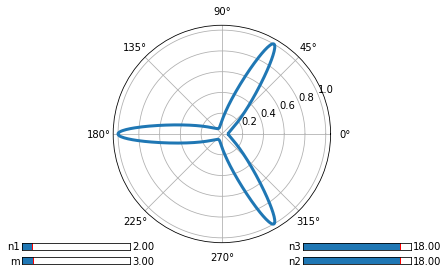

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111,polar=True)
ax_m = plt.axes([0.05,0.05,0.25,0.025])
ax_n1 = plt.axes([0.05,0.10,0.25,0.025])
ax_n2 = plt.axes([0.7,0.05,0.25,0.025])
ax_n3 = plt.axes([0.7,0.10,0.25,0.025])
slider_m =Slider(ax_m,'m',1,20,valinit=m_init)
slider_n1 =Slider(ax_n1,'n1',0.1,20,valinit=n1_init)
slider_n2 =Slider(ax_n2,'n2',0.1,20,valinit=n2_init)
slider_n3 =Slider(ax_n3,'n3',0.1,20,valinit=n3_init)
r=supershape_radius(phi,1,1,m_init,n1_init,n2_init,n3_init)
lines, = ax.plot(phi,r,lw=3.0)
def update(val):
    r= supershape_radius(phi,1,1,np.floor(slider_m.val),slider_n1.val,slider_n2.val,slider_n3.val)
    lines.set_ydata(r)
    fig.canvas.draw_idle()
slider_n1.on_changed(update)
slider_n2.on_changed(update)
slider_n3.on_changed(update)
slider_m.on_changed(update)
plt.show()